In [1]:
import requests
import zipfile
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

plt.rcParams['figure.dpi']     = 100
plt.rcParams['figure.figsize'] = 12,8
plt.rcParams['axes.prop_cycle'] = cycler('color', ['cadetblue','orangered','gold', 'navy'])

In [2]:
r = requests.get('https://arcgis.com/sharing/rest/content/items/a8c562ead9c54e13a135b02e0d875ffb/data')
zawartosc = r.content

with open('dane//dane.zip', 'wb') as plik:
    plik.write(zawartosc)


with zipfile.ZipFile('dane//dane.zip') as spaklowany_plik:
    spaklowany_plik.extractall(pathlib.Path('dane/pliki'))

lista_plikow = list(pathlib.Path.glob(pathlib.Path('dane/pliki'), '*.csv'))

kowidowe = []

for plik in lista_plikow:
    kowidowe.append(pd.read_csv(plik,encoding= 'ANSI', sep = ';'))   #windows-1250
    kowidowe[-1]['stan_rekordu_na'] = pd.to_datetime(str(plik)[11:19],format='%Y%m%d') - pd.Timedelta(1, unit='days')

wypisujemy nazwy kolumn w pliku z danymi archiwalnymi

In [28]:
arch_data0 = pd.read_csv(pathlib.Path('dane/mat_arch.csv'), sep = ';',decimal=' ', encoding= 'windows-1250')
arch_data0


ad = pd.DataFrame()
ad['wojewodztwo'] = ['Cały kraj'] * 266
ad['teryt'] = 't00'
ad['liczba_nowych_zakazen'] = arch_data0['Nowe przypadki'].astype('int32')
ad['liczba_ponownych_zakazen'] = np.NaN
ad['liczba_wszystkich_zakazen'] = arch_data0['Nowe przypadki'].astype('int32')
ad['zgony'] = arch_data0['Zgony']
ad['zgony_w_wyniku_covid_bez_chorob_wspolistniejacych'] = np.NaN
ad['zgony_w_wyniku_covid_i_chorob_wspolistniejacych']   = np.NaN
ad['liczba_ozdrowiencow']  = arch_data0['Ozdrowieńcy (dzienna)']
ad['stan_rekordu_na']  = pd.to_datetime(arch_data0['Data'], format='%d.%m.%Y') - pd.Timedelta(days = 1)


arch_data0
#ad

,Unnamed: 0,Data,Nowe przypadki,Wszystkie przypadki kumulatywnie,Zgony,Wszystkie zgony kumulatywnie,Ozdrowieńcy (dzienna),Ozdrowieńcy (suma),Aktywne przypadki,Kwarantanna,Nadzór
0,wtorek,03.03.2020,0.0,0,0,0.000,0,0.0,0,316,4459.0
1,środa,04.03.2020,1.0,1,0,0.000,0,0.0,0,349,4540.0
2,czwartek,05.03.2020,0.0,1,0,0.000,0,0.0,0,490,5647.0
3,piątek,06.03.2020,4.0,5,0,0.000,0,0.0,0,1299,6184.0
4,sobota,07.03.2020,1.0,6,0,0.000,0,0.0,0,1548,6409.0
...,...,...,...,...,...,...,...,...,...,...,...
261,czwartek,19.11.2020,23975.0,796798,637,12088.000,19914,381.8,402910,408567,23153.0
262,piątek,20.11.2020,22464.0,819262,626,12714.000,25275,407075.0,399473,391837,22982.0
263,sobota,21.11.2020,24213.0,843475,574,13.288,16896,423971.0,406216,356130,22156.0
264,niedziela,22.11.2020,17856.0,861331,330,13.618,14897,438868.0,408845,362959,21290.0


przejrzenie nazw kolumn w plikach w poszukiwaniu nie-duplikatów nazw kolumn

In [32]:
durnotka = []
for tab in kowidowe:
    if tab.shape[1] == 19:
        durnotka.append(pd.DataFrame(
            {
            'wojewodztwo': tab['wojewodztwo'],
            'teryt': tab['teryt'],
            'liczba_nowych_zakazen': tab['liczba_nowych_zakazen'],
            'liczba_ponownych_zakazen' : tab['liczba_ponownych_zakazen'],
            'liczba_wszystkich_zakazen': tab['liczba_wszystkich_zakazen'],
            'zgony' : tab['zgony'],
            'zgony_w_wyniku_covid_bez_chorob_wspolistniejacych' : tab['zgony_w_wyniku_covid_bez_chorob_wspolistniejacych'],
            'zgony_w_wyniku_covid_i_chorob_wspolistniejacych' : tab['zgony_w_wyniku_covid_i_chorob_wspolistniejacych'],
            'liczba_ozdrowiencow' : tab['liczba_ozdrowiencow'],
            'stan_rekordu_na' : tab['stan_rekordu_na']
            }))
    elif tab.shape[1] == 14 and 'liczba_ozdrowiencow' not in tab.columns:
         durnotka.append(pd.DataFrame(
            {
            'wojewodztwo': tab['wojewodztwo'],
            'teryt': tab['teryt'],
            'liczba_nowych_zakazen': tab['liczba_przypadkow'],
            'liczba_ponownych_zakazen' : np.NaN,   
            'liczba_wszystkich_zakazen': tab['liczba_przypadkow'],
            'zgony' : tab['zgony'],
            'zgony_w_wyniku_covid_bez_chorob_wspolistniejacych' : tab['zgony_w_wyniku_covid_bez_chorob_wspolistniejacych'],
            'zgony_w_wyniku_covid_i_chorob_wspolistniejacych' : tab['zgony_w_wyniku_covid_i_chorob_wspolistniejacych'],
            'liczba_ozdrowiencow' : np.NaN,
            'stan_rekordu_na' : tab['stan_rekordu_na']
            }))

    elif tab.shape[1] == 15:
         durnotka.append(pd.DataFrame(
            {
            'wojewodztwo': tab['wojewodztwo'],
            'teryt': tab['teryt'],
            'liczba_nowych_zakazen': tab['liczba_przypadkow'],
            'liczba_ponownych_zakazen' : np.NaN,   
            'liczba_wszystkich_zakazen': tab['liczba_przypadkow'],
            'zgony' : tab['zgony'],
            'zgony_w_wyniku_covid_bez_chorob_wspolistniejacych' : tab['zgony_w_wyniku_covid_bez_chorob_wspolistniejacych'],
            'zgony_w_wyniku_covid_i_chorob_wspolistniejacych' : tab['zgony_w_wyniku_covid_i_chorob_wspolistniejacych'],
            'liczba_ozdrowiencow' : tab['liczba_ozdrowiencow'],
            'stan_rekordu_na' : tab['stan_rekordu_na']
            }))
durnotka.append(ad)
a = pd.concat(durnotka, ignore_index = True)
(a.loc[a['teryt'] == 't00'].groupby('teryt').style.bar(subset= 'zgony', color = 'red'))



AttributeError: 'DataFrameGroupBy' object has no attribute 'style'

<h4>Wyjściowa forma tabeli, to ta z plikow od 441 do końca, gdzie mamy 19 kolumn. <br>
będziemy starali sie zmienić oznaczenia kolumn z poprzednich plików na te 19ście </h4>


C:\Users\geos48.GEOSERWIS\AppData\Local\Temp\ipykernel_15852\2958701164.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['stan_rekordu_na', 'teryt', 'wojewodztwo'], dtype='object')
  sns.lineplot(data = b.rolling(window = 7, min_periods=1, closed = 'left', center =True).median(), x = 'stan_rekordu_na', y = 'zgony', label = '1')
C:\Users\geos48.GEOSERWIS\AppData\Local\Temp\ipykernel_15852\2958701164.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['stan_rekordu_na', 'teryt', 'wojewodztwo'], dtype='object')
  sns.lineplot(data = b[b['zgony_w_wyniku_covid_bez_chorob_wspolistniejacych'].notna()].rolling(window = 7, min_periods=1, closed = 'left', center =Tru

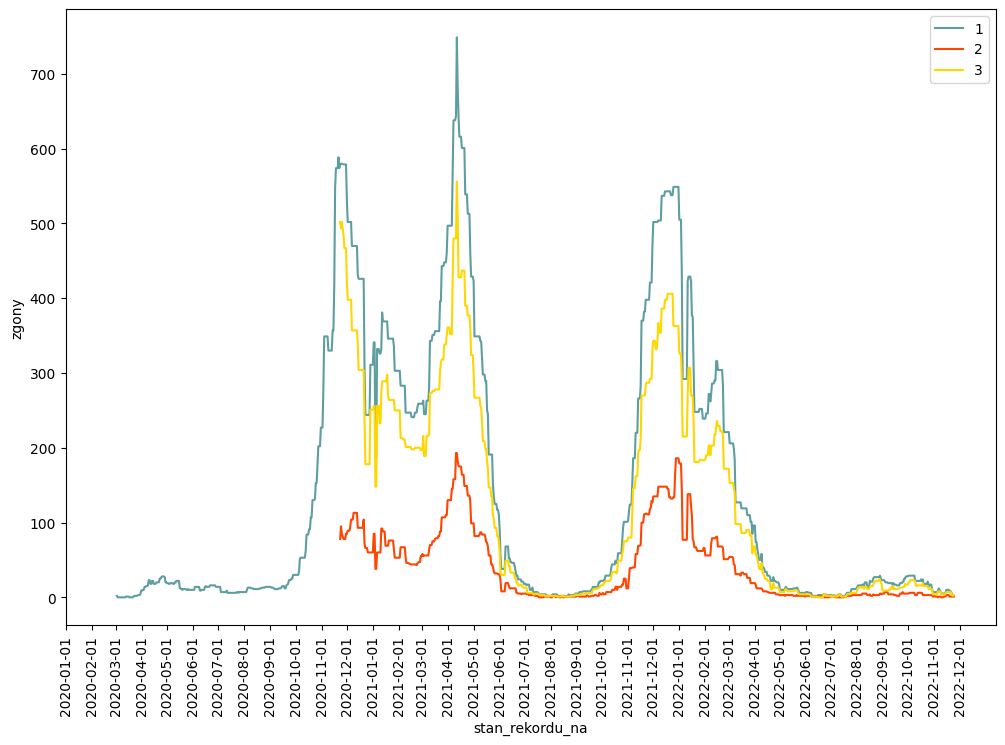

In [42]:
b = a.loc[a['teryt'] == 't00']
b.index = b['stan_rekordu_na']
sns.lineplot(data = b.rolling(window = 7, min_periods=1, closed = 'left', center =True).median(), x = 'stan_rekordu_na', y = 'zgony', label = '1')
sns.lineplot(data = b[b['zgony_w_wyniku_covid_bez_chorob_wspolistniejacych'].notna()].rolling(window = 7, min_periods=1, closed = 'left', center =True).median(), x = 'stan_rekordu_na', y = 'zgony_w_wyniku_covid_bez_chorob_wspolistniejacych', label = '2')
sns.lineplot(data = b[b['zgony_w_wyniku_covid_i_chorob_wspolistniejacych'].notna()].rolling(window = 7, min_periods=1, closed = 'left', center =True).median(), x = 'stan_rekordu_na', y = 'zgony_w_wyniku_covid_i_chorob_wspolistniejacych', label = '3')
#sns.lineplot(data = a.loc[a['teryt'] == 't00'], x = 'stan_rekordu_na', y = 'liczba_ozdrowiencow', hue = 'teryt', label = '2')
plt.xticks([pd.to_datetime(f'{rok}-{mies}', format = '%Y-%m') for mies in range(1,13) for rok in range(2020,2023)], rotation = 90)
plt.show()


